In [1]:
from preprocessing import PreProcessor

import pandas as pd
import gensim
import nltk

from matplotlib import pyplot as plt
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.model_selection import train_test_split

In [2]:
pp = PreProcessor()

In [3]:
df = pd.read_csv('Balanced_Sample_500.csv')
df.columns = ['recordID','Category','Item','categoryID']
df

,recordID,Category,Item,categoryID
0,40127,Counterfeits/Watches,Emporio Armani - AR1610 Shell Case ceramic bra...,0
1,40126,Counterfeits/Watches,Cartier-Tank Ladies Brand: Cartier Series: Tan...,0
2,40125,Counterfeits/Watches,Patek Philippe watch box ★ Patek Philippe - Wa...,0
3,40130,Counterfeits/Watches,Breitling - NAVITIMER COSMONAUTE 【Replica】 Wat...,0
4,40129,Counterfeits/Watches,Emporio Armani Men's AR0397 Dial color Gary Wa...,0
...,...,...,...,...
14995,15401,Services/Money,1 Canada CC You get: Card number CVV Expiry d...,29
14996,15402,Services/Money,5 UK Debit Cards Take the chance to buy 5 UK V...,29
14997,15403,Services/Money,1 ITALY Card details HIGH Validity 75-99% ** F...,29
14998,15404,Services/Money,1 Centurion/Black CC You get: 1 US Centurion C...,29


In [4]:
df["Item"] = df.apply(lambda d: pp.preprocess(str(d["Item"]), tokenize=True), axis = 1)
#df.insert(2, "Vector", None) 
df

,recordID,Category,Item,categoryID
0,40127,Counterfeits/Watches,"[emporio, armani, ar, shell, case, ceramic, br...",0
1,40126,Counterfeits/Watches,"[cartiertank, ladies, brand, cartier, series, ...",0
2,40125,Counterfeits/Watches,"[patek, philippe, watch, box, patek, philippe,...",0
3,40130,Counterfeits/Watches,"[breitling, navitimer, cosmonaute, replica, wa...",0
4,40129,Counterfeits/Watches,"[emporio, armani, mens, ar, dial, color, gary,...",0
...,...,...,...,...
14995,15401,Services/Money,"[canada, cc, get, card, number, cvv, expiry, d...",29
14996,15402,Services/Money,"[uk, debit, cards, take, chance, buy, uk, visa...",29
14997,15403,Services/Money,"[italy, card, details, high, validity, fresh, ...",29
14998,15404,Services/Money,"[centurionblack, cc, get, us, centurion, cc, c...",29


In [5]:
# w2v = Word2Vec(df["Item"])
# w2v.vocabulary

In [6]:
# for index, row in df.iterrows():
#     vectors = []
#     for item in row['Item']:
#         try:
#             vectors.append(w2v[item])
#         except:
#             pass
#     df.at[index, 'Vector'] = vectors
# df

In [53]:
#dit heb ik van 'https://stackoverflow.com/questions/14533420/can-you-suggest-a-good-minhash-implementation' gestolen :)
from scipy.spatial.distance import cosine
from random import randint
import numpy as np

# specify the length of each minhash vector
N = 32
max_val = (2**32)-1

# create N tuples that will serve as permutation functions
# these permutation values are used to hash all input sets
perms = [ (randint(0,max_val), randint(0,max_val)) for i in range(N)]

# initialize a sample minhash vector of length N
# each record will be represented by its own vec
vec = [float('inf') for i in range(N)]

def minhash(s, prime=4294967311):
  '''
  Given a set `s`, pass each member of the set through all permutation
  functions, and set the `ith` position of `vec` to the `ith` permutation
  function's output if that output is smaller than `vec[i]`.
  '''
  # initialize a minhash of length N with positive infinity values
  vec = [float('inf') for i in range(N)]

  for val in s:

    # ensure s is composed of integers
    if not isinstance(val, int): val = hash(val)

    # loop over each "permutation function"
    for perm_idx, perm_vals in enumerate(perms):
      a, b = perm_vals

      # pass `val` through the `ith` permutation function
      output = (a * val + b) % prime

      # conditionally update the `ith` value of vec
      if vec[perm_idx] > output:
        vec[perm_idx] = output

  # the returned vector represents the minimum hash of the set s
  return vec

In [54]:
#df.insert(4, "MinHash", None)
shingles = []
sentence = []
for index, row in df.iterrows():
    shingles.append(minhash(set(row["Item"])))
    df.at[index, 'MinHash'] = shingles[0]
    shingles = []
    sentence = []
    

In [55]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
train

,recordID,Category,Item,categoryID,MinHash
11797,97782,Drugs/Stimulants/Cocaine,"[fe, high, quality, cocaine, grams, welcome, c...",23,"[410430248, 85994685, 46389451, 226456830, 210..."
5899,64488,Drugs/Ecstasy/MDMA,"[crystal, sample, size, tested, mdma, usa, wan...",11,"[8559384, 59558263, 160902924, 40842048, 86596..."
9513,82886,Drugs/Psychedelics/Mushrooms,"[p, subaeruginosa, g, highly, potent, strain, ...",19,"[114060602, 189039733, 71597066, 30190554, 214..."
1572,9234,Drugs/Benzos,"[xanax, mg, alprazolam, r, brand, pills, xanax...",3,"[170825327, 21457012, 119860790, 491147577, 60..."
12995,67268,Drugs/Stimulants/Prescription,"[adderall, xr, x, mg, free, sameday, shipping,...",25,"[40474999, 436600097, 133109190, 10018212, 481..."
...,...,...,...,...,...
5191,44130,Drugs/Dissociatives/Ketamine,"[g, ketamine, usa, domestic, gram, ketamine, b...",10,"[188210425, 20779317, 722414679, 76567914, 744..."
13418,14949,Drugs/Stimulants/Speed,"[gr, pure, speed, paste, interways, presents, ...",26,"[31768278, 20902753, 134824831, 76567914, 4834..."
5390,44052,Drugs/Dissociatives/Ketamine,"[fe, discount, ketamine, gram, free, post, one...",10,"[78813165, 20779317, 522095325, 62319233, 5175..."
860,49973,Data/Accounts,"[spotify, premium, account, stream, music, go,...",1,"[115771855, 199191172, 46389451, 35300800, 454..."


In [59]:
data1 = set(['minhash', 'is', 'a', 'probabilistic', 'data', 'structure', 'for',
        'estimating', 'the', 'similarity', 'between', 'datasets'])
data2 = set(['minhash', 'is', 'a', 'probabilistic', 'data', 'structure', 'for',
        'estimating', 'the', 'similarity', 'between', 'data'])

# get the minhash vectors for each input set
vec1 = minhash(data1)
vec2 = minhash(data2)

# divide both vectors by their max values to scale values {0:1}
vec1 = np.array(vec1) / max(vec1)
vec2 = np.array(vec2) / max(vec2)

# measure the similarity between the vectors using cosine similarity
print( 'similarity:',( 1 - cosine(vec1, vec2))*100, "%" )

similarity: 98.05923289154053 %


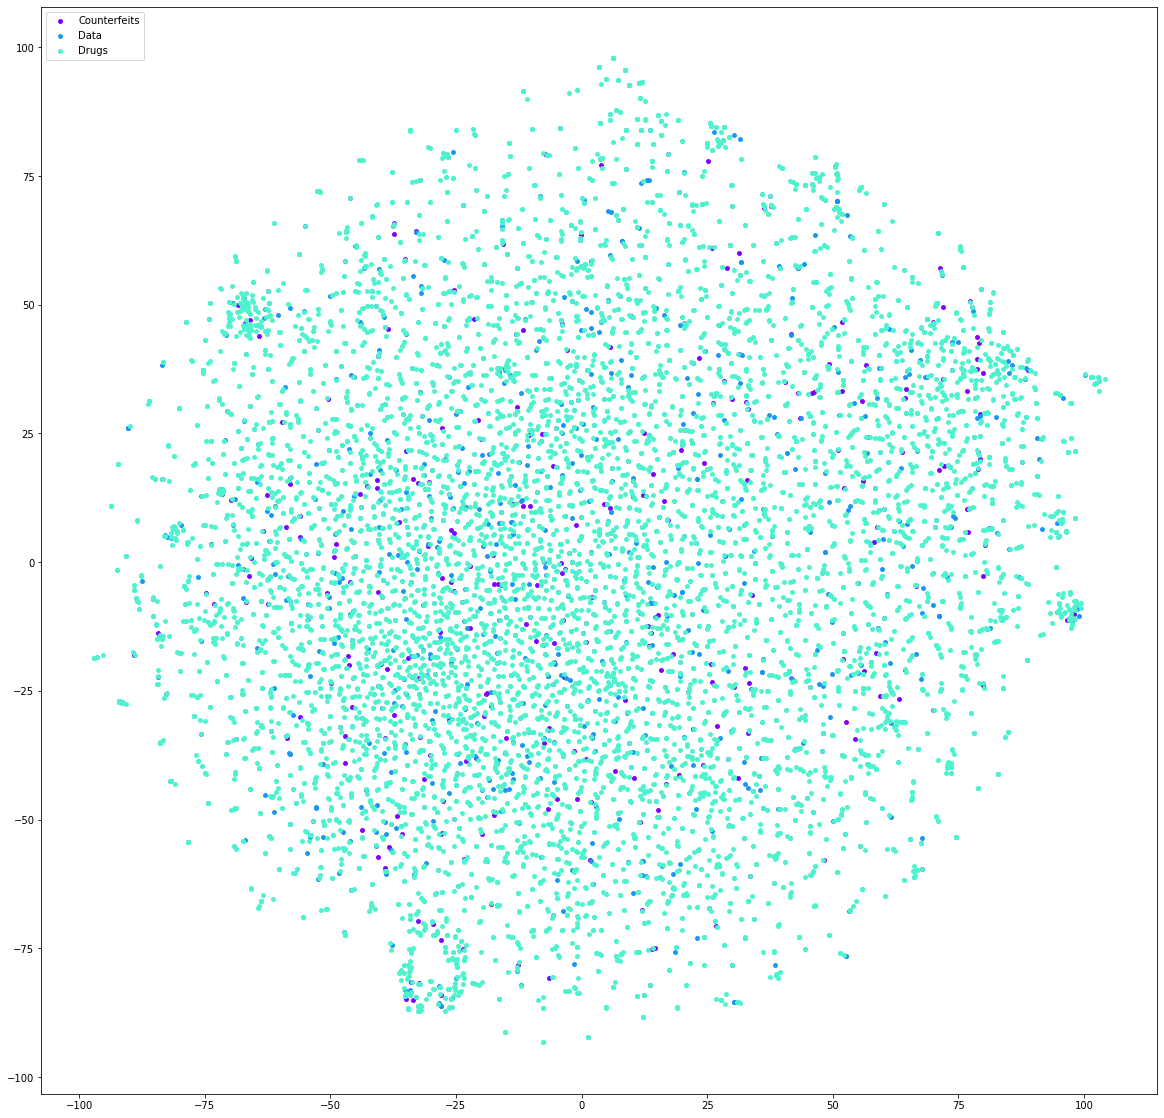

In [65]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
    
def category_color(length):
    colors = cm.rainbow(np.linspace(0, 1, length))
    indices = np.arange(0, len(colors))
    indices = indices.reshape(len(indices), 1)
    return colors[indices]
    
# create colors
unique_categories = df['Category'].apply(lambda x: x.split('/', 1)[0]).unique()
# unique_categories = df['Category'].unique()
colors = category_color(len(unique_categories))

# create plot
fig, ax = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(20)

# scatter
for index, item in enumerate(u):
    category = df['Category'][index].split('/', 1)[0]
    category_index, = np.where(unique_categories == category)
    ax.scatter(item[0], item[1], c=colors[category_index[0]], label=category, s=15)

# legend
handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
ax.legend(*zip(*unique), loc="upper left")

# show
plt.show()